***This EDA is for TLC NewYork tripdata of Green taxis for the month of November 2019.
The first step of Exploratory Data Analysis (EDA) is to import all the necessary libraries and import the CSV file and convert it into dataframe.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
filepath=r"C:\Users\bhoomika\Downloads\green_tripdata_2019-11.csv"
taxidata=pd.read_csv(filepath)
taxidata

C:\Users\bhoomika\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2019-11-01 00:11:24,2019-11-01 00:23:12,N,1.0,66,148,1.0,2.80,11.50,0.50,0.5,3.11,0.00,NaN,0.3,18.66,1.0,1.0,2.75
1,2.0,2019-11-01 00:49:25,2019-11-01 01:14:19,N,1.0,145,114,1.0,5.59,20.00,0.50,0.5,6.03,6.12,NaN,0.3,36.20,1.0,1.0,2.75
2,1.0,2019-11-01 00:57:22,2019-11-01 01:09:23,N,1.0,255,37,1.0,2.10,10.00,0.50,0.5,2.25,0.00,NaN,0.3,13.55,1.0,1.0,0.00
3,2.0,2019-11-01 00:59:52,2019-11-01 01:08:19,N,1.0,7,226,1.0,1.23,7.50,0.50,0.5,0.00,0.00,NaN,0.3,8.80,2.0,1.0,0.00
4,2.0,2019-11-01 00:40:13,2019-11-01 00:47:41,N,1.0,129,129,1.0,1.18,7.00,0.50,0.5,0.00,0.00,NaN,0.3,8.30,2.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449495,NaN,2019-11-30 23:12:00,2019-11-30 23:22:00,NaN,NaN,9,56,NaN,3.96,25.16,2.75,0.5,0.00,0.00,NaN,0.0,28.41,NaN,NaN,NaN
449496,NaN,2019-11-30 23:34:00,2019-11-30 23:37:00,NaN,NaN,10,215,NaN,0.68,18.38,2.75,0.5,0.00,0.00,NaN,0.0,21.63,NaN,NaN,NaN
449497,NaN,2019-11-30 23:44:00,2019-12-01 00:06:00,NaN,NaN,235,246,NaN,-9.41,39.41,2.75,0.5,0.00,0.00,NaN,0.3,42.96,NaN,NaN,NaN
449498,NaN,2019-11-30 23:40:00,2019-12-01 00:08:00,NaN,NaN,119,244,NaN,8.33,25.75,2.75,0.5,0.00,0.00,NaN,0.0,29.00,NaN,NaN,NaN


***The next step is to obtain basic insights from the data as well as cleaning the data-***

In [3]:
taxidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449500 entries, 0 to 449499
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               362429 non-null  float64
 1   lpep_pickup_datetime   449500 non-null  object 
 2   lpep_dropoff_datetime  449500 non-null  object 
 3   store_and_fwd_flag     362429 non-null  object 
 4   RatecodeID             362429 non-null  float64
 5   PULocationID           449500 non-null  int64  
 6   DOLocationID           449500 non-null  int64  
 7   passenger_count        362429 non-null  float64
 8   trip_distance          449500 non-null  float64
 9   fare_amount            449500 non-null  float64
 10  extra                  449500 non-null  float64
 11  mta_tax                449500 non-null  float64
 12  tip_amount             449500 non-null  float64
 13  tolls_amount           449500 non-null  float64
 14  ehail_fee              0 non-null   

***.info() gives us an estimate about the missing values present in the dataframe that will be dropped.***

In [4]:
taxidata1=taxidata.drop(columns='ehail_fee')

***ehail column is dropped as it contains no information.***

In [5]:
taxidata1.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,362429.000000,362429.000000,449500.000000,449500.000000,362429.000000,449500.000000,449500.000000,449500.000000,449500.000000,449500.000000,449500.000000,449500.000000,449500.00000,362429.000000,362429.000000,362429.000000
mean,1.831865,1.102892,108.071324,129.317522,1.315510,2.892347,15.522099,0.848492,0.486137,0.975991,0.297216,0.248075,18.70784,1.462918,1.024052,0.449107
std,0.373987,0.663611,71.079011,76.304598,0.980689,44.142252,13.050716,1.157716,0.089343,1.939599,1.387889,0.115342,14.51974,0.522726,0.153210,1.016587
min,1.000000,1.000000,1.000000,1.000000,0.000000,-20329.080000,-125.000000,-4.500000,-0.500000,-3.600000,0.000000,-0.300000,-125.00000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,52.000000,65.000000,1.000000,0.990000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.80000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.880000,11.500000,0.500000,0.500000,0.000000,0.000000,0.300000,14.16000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,193.000000,1.000000,3.850000,20.500000,1.000000,0.500000,1.620000,0.000000,0.300000,24.42000,2.000000,1.000000,0.000000
max,2.000000,99.000000,265.000000,265.000000,9.000000,105.720000,833.330000,8.250000,3.550000,225.000000,42.240000,0.470000,833.33000,5.000000,2.000000,2.750000


***This is statistical representation of numerical features of dataframe.***

In [6]:
taxidata1=taxidata1.dropna()
taxidata1

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2019-11-01 00:11:24,2019-11-01 00:23:12,N,1.0,66,148,1.0,2.80,11.5,0.5,0.5,3.11,0.00,0.3,18.66,1.0,1.0,2.75
1,2.0,2019-11-01 00:49:25,2019-11-01 01:14:19,N,1.0,145,114,1.0,5.59,20.0,0.5,0.5,6.03,6.12,0.3,36.20,1.0,1.0,2.75
2,1.0,2019-11-01 00:57:22,2019-11-01 01:09:23,N,1.0,255,37,1.0,2.10,10.0,0.5,0.5,2.25,0.00,0.3,13.55,1.0,1.0,0.00
3,2.0,2019-11-01 00:59:52,2019-11-01 01:08:19,N,1.0,7,226,1.0,1.23,7.5,0.5,0.5,0.00,0.00,0.3,8.80,2.0,1.0,0.00
4,2.0,2019-11-01 00:40:13,2019-11-01 00:47:41,N,1.0,129,129,1.0,1.18,7.0,0.5,0.5,0.00,0.00,0.3,8.30,2.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362424,2.0,2019-11-30 23:52:14,2019-12-01 00:18:36,N,1.0,80,135,1.0,8.84,30.5,0.5,0.5,0.00,0.00,0.3,31.80,2.0,1.0,0.00
362425,2.0,2019-11-30 23:31:28,2019-11-30 23:40:53,N,1.0,42,168,1.0,2.11,9.0,0.5,0.5,0.00,0.00,0.3,10.30,2.0,1.0,0.00
362426,2.0,2019-11-30 23:03:17,2019-11-30 23:25:44,N,1.0,41,235,1.0,4.89,19.0,0.5,0.5,0.00,0.00,0.3,20.30,2.0,1.0,0.00
362427,2.0,2019-11-30 23:41:28,2019-12-01 23:25:44,N,1.0,78,78,1.0,0.06,2.5,0.5,0.5,0.00,0.00,0.3,3.80,2.0,1.0,0.00


In [7]:
taxidata2=taxidata1.drop_duplicates()
taxidata2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2019-11-01 00:11:24,2019-11-01 00:23:12,N,1.0,66,148,1.0,2.80,11.5,0.5,0.5,3.11,0.00,0.3,18.66,1.0,1.0,2.75
1,2.0,2019-11-01 00:49:25,2019-11-01 01:14:19,N,1.0,145,114,1.0,5.59,20.0,0.5,0.5,6.03,6.12,0.3,36.20,1.0,1.0,2.75
2,1.0,2019-11-01 00:57:22,2019-11-01 01:09:23,N,1.0,255,37,1.0,2.10,10.0,0.5,0.5,2.25,0.00,0.3,13.55,1.0,1.0,0.00
3,2.0,2019-11-01 00:59:52,2019-11-01 01:08:19,N,1.0,7,226,1.0,1.23,7.5,0.5,0.5,0.00,0.00,0.3,8.80,2.0,1.0,0.00
4,2.0,2019-11-01 00:40:13,2019-11-01 00:47:41,N,1.0,129,129,1.0,1.18,7.0,0.5,0.5,0.00,0.00,0.3,8.30,2.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362424,2.0,2019-11-30 23:52:14,2019-12-01 00:18:36,N,1.0,80,135,1.0,8.84,30.5,0.5,0.5,0.00,0.00,0.3,31.80,2.0,1.0,0.00
362425,2.0,2019-11-30 23:31:28,2019-11-30 23:40:53,N,1.0,42,168,1.0,2.11,9.0,0.5,0.5,0.00,0.00,0.3,10.30,2.0,1.0,0.00
362426,2.0,2019-11-30 23:03:17,2019-11-30 23:25:44,N,1.0,41,235,1.0,4.89,19.0,0.5,0.5,0.00,0.00,0.3,20.30,2.0,1.0,0.00
362427,2.0,2019-11-30 23:41:28,2019-12-01 23:25:44,N,1.0,78,78,1.0,0.06,2.5,0.5,0.5,0.00,0.00,0.3,3.80,2.0,1.0,0.00


***Rows with null values and duplicate rows are deleted.***

In [8]:
taxidata2.shape

(362427, 19)

In [9]:
taxidata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362427 entries, 0 to 362428
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               362427 non-null  float64
 1   lpep_pickup_datetime   362427 non-null  object 
 2   lpep_dropoff_datetime  362427 non-null  object 
 3   store_and_fwd_flag     362427 non-null  object 
 4   RatecodeID             362427 non-null  float64
 5   PULocationID           362427 non-null  int64  
 6   DOLocationID           362427 non-null  int64  
 7   passenger_count        362427 non-null  float64
 8   trip_distance          362427 non-null  float64
 9   fare_amount            362427 non-null  float64
 10  extra                  362427 non-null  float64
 11  mta_tax                362427 non-null  float64
 12  tip_amount             362427 non-null  float64
 13  tolls_amount           362427 non-null  float64
 14  improvement_surcharge  362427 non-nu

In [10]:
taxidata2.dtypes

VendorID                 float64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

In [11]:
taxidata2.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [12]:
taxidata3=taxidata2.rename(columns={'extra':'rush_hour / overnight_charges'})

***'Extra' column renamed to 'rush_hour / overnight_charges' to increase understandability and readability of dataframe.***

In [13]:
taxidata3.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount',
       'rush_hour / overnight_charges', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type',
       'trip_type', 'congestion_surcharge'],
      dtype='object')

In [14]:
#To get unique VendorIDs from the dataframe-
unique_value=taxidata3["VendorID"].unique()
unique_value

array([2., 1.])

In [15]:
#To get total nummber of rides finished by each vendor with a plot-
value_count=taxidata3['VendorID'].value_counts()
value_count

2.0    301490
1.0     60937
Name: VendorID, dtype: int64

([<matplotlib.axis.XTick at 0x19f8297fd88>,
 <a list of 6 Text xticklabel objects>)

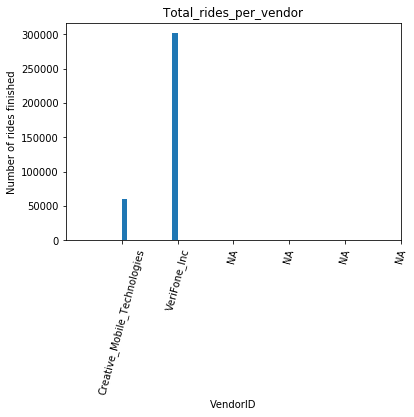

In [24]:
plt.hist(taxidata3["VendorID"])
plt.xlabel('VendorID')
plt.xlim(0,5)
plt.ylabel('Number of rides finished')
plt.title("Total_rides_per_vendor")
positions=(1,2,3,4,5,6)

labels=("Creative_Mobile_Technologies","VeriFone_Inc","NA","NA","NA","NA")
plt.xticks(positions,labels,rotation=75)

***VendorID is a categorical variable with categories 1.0 (Creative Mobile Technologies) and 2.0 (VeriFone Inc.). Number of rides finised by VeriFone Inc. (301490) is clearly much more than those finished by Creative Mobile Technologies (60937).***

In [21]:
mean_val=taxidata3.groupby("VendorID")["total_amount"].mean()
mean_val

VendorID
1.0    16.150225
2.0    15.150219
Name: total_amount, dtype: float64

(0, 5)

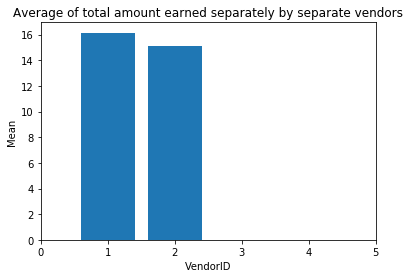

In [27]:
mean_val=taxidata3.groupby("VendorID")["total_amount"].mean()
mean_val
vendID=[1,2]
plt.bar(vendID,mean_val)
plt.title("Average of total amount earned separately by separate vendors")
plt.xlabel("VendorID")
plt.ylabel("Mean")
plt.xlim(0,5)

***This graph represents mean of Total amount earned separately by separate vendors.***

In [28]:
ar1=taxidata3.groupby("VendorID")["total_amount"].sum()
ar1

VendorID
1.0    9.841463e+05
2.0    4.567639e+06
Name: total_amount, dtype: float64

In [29]:
ar3=taxidata3.VendorID.value_counts( ascending= True)
ar3

1.0     60937
2.0    301490
Name: VendorID, dtype: int64

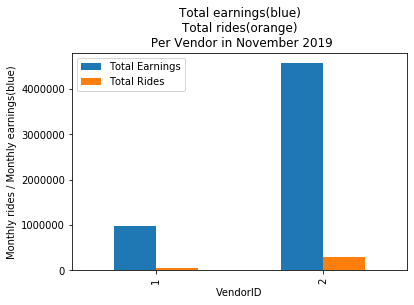

In [30]:
ar1=taxidata3.groupby("VendorID")["total_amount"].sum()
ar3=taxidata3.VendorID.value_counts( ascending= True)
ar2=[1,2]
gph=pd.DataFrame(np.c_[ar1,ar3], index=ar2)
gph.plot.bar()
plt.xlabel("VendorID")
plt.ylabel("Monthly rides / Monthly earnings(blue)")
plt.title("Total earnings(blue)\nTotal rides(orange)\n Per Vendor in November 2019")
plt.legend(['Total Earnings','Total Rides'])
plt.show()

***This combined bar graph depicts that both total rides and total earnings by vendor with VendorID=2 is more than that by vendor with VendorID=1. Hence, Verifone Inc. made more profit than Creative Mobile Technologies.***

In [41]:
taxidata3.groupby("VendorID")["total_amount"].nlargest(5)


VendorID        
1.0       285979    301.55
          12014     164.00
          50138     162.00
          248550    160.29
          98951     156.12
2.0       298600    833.33
          5009      499.00
          32032     487.00
          269653    484.80
          186555    480.00
Name: total_amount, dtype: float64

In [42]:
taxidata3.groupby("VendorID")["trip_distance"].nlargest(5)

VendorID        
1.0       108512     57.50
          86829      56.80
          285979     54.90
          268209     51.30
          201179     42.10
2.0       332540    105.72
          26009      71.86
          152986     68.63
          135231     67.23
          328867     64.10
Name: trip_distance, dtype: float64

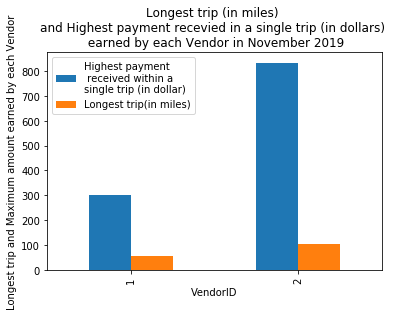

In [48]:
ar1=taxidata3.groupby("VendorID")["total_amount"].nlargest(1)
ar3=taxidata3.groupby("VendorID")["trip_distance"].nlargest(1)
ar2=[1,2]
gph=pd.DataFrame(np.c_[ar1,ar3], index=ar2)
gph.plot.bar()
plt.xlabel("VendorID")
plt.ylabel("Longest trip and Maximum amount earned by each Vendor")
plt.title("Longest trip (in miles) \nand Highest payment recevied in a single trip (in dollars) \n earned by each Vendor in November 2019")
plt.legend(['Highest payment \n received within a \nsingle trip (in dollar)','Longest trip(in miles)'])
plt.show()

***Clearly, Vendor with VendorID=2 has greater maximum single trip distance (105.72 miles) as well as greater maximum amount earned in a single trip (833.33 dollars). 
Moreover, another important observation to be made is that both of these values for any of the vendors is not found to be correlated, that is, maximum single trip distance (105.72 miles- record number 332540) and maximum amount earned in a single trip (833.33$- record number 298600) does not belong to the same row, that is, both of these values doesn't belong to the same row entry in dataframe, suggesting that total_amount charged from the customer at times depend much more upon several other factors other than total distance in miles.*** 

In [82]:
#the following code will provide two rows as result with both required values present as spearate records.
taxidata3[(taxidata3["trip_distance"]==105.72) | (taxidata["total_amount"]==833.33)]

C:\Users\bhoomika\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_date,pickup_time
298600,2.0,2019-11-25 11:11:00,2019-11-25 11:11:00,N,5.0,264,264,1.0,0.00,833.33,...,0.0,0.0,0.0,0.0,833.33,1.0,1.0,0.0,2019-11-25,11:11:00
332540,2.0,2019-11-28 08:16:47,2019-11-28 17:47:36,N,5.0,7,154,2.0,105.72,12.00,...,0.0,0.0,0.0,0.3,12.30,2.0,1.0,0.0,2019-11-28,08:16:47



**Now, pickup datetime column is splitted into two separate columns to gain insights involving pickup date.**

In [53]:
df=taxidata3

In [54]:
df.lpep_pickup_datetime.str.split(expand=True,)

,0,1
0,2019-11-01,00:11:24
1,2019-11-01,00:49:25
2,2019-11-01,00:57:22
3,2019-11-01,00:59:52
4,2019-11-01,00:40:13
...,...,...
362424,2019-11-30,23:52:14
362425,2019-11-30,23:31:28
362426,2019-11-30,23:03:17
362427,2019-11-30,23:41:28


In [55]:
df[['pickup_date','pickup_time']]=df.lpep_pickup_datetime.str.split(" ",expand=True,)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_date,pickup_time
0,2.0,2019-11-01 00:11:24,2019-11-01 00:23:12,N,1.0,66,148,1.0,2.80,11.5,...,0.5,3.11,0.00,0.3,18.66,1.0,1.0,2.75,2019-11-01,00:11:24
1,2.0,2019-11-01 00:49:25,2019-11-01 01:14:19,N,1.0,145,114,1.0,5.59,20.0,...,0.5,6.03,6.12,0.3,36.20,1.0,1.0,2.75,2019-11-01,00:49:25
2,1.0,2019-11-01 00:57:22,2019-11-01 01:09:23,N,1.0,255,37,1.0,2.10,10.0,...,0.5,2.25,0.00,0.3,13.55,1.0,1.0,0.00,2019-11-01,00:57:22
3,2.0,2019-11-01 00:59:52,2019-11-01 01:08:19,N,1.0,7,226,1.0,1.23,7.5,...,0.5,0.00,0.00,0.3,8.80,2.0,1.0,0.00,2019-11-01,00:59:52
4,2.0,2019-11-01 00:40:13,2019-11-01 00:47:41,N,1.0,129,129,1.0,1.18,7.0,...,0.5,0.00,0.00,0.3,8.30,2.0,1.0,0.00,2019-11-01,00:40:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362424,2.0,2019-11-30 23:52:14,2019-12-01 00:18:36,N,1.0,80,135,1.0,8.84,30.5,...,0.5,0.00,0.00,0.3,31.80,2.0,1.0,0.00,2019-11-30,23:52:14
362425,2.0,2019-11-30 23:31:28,2019-11-30 23:40:53,N,1.0,42,168,1.0,2.11,9.0,...,0.5,0.00,0.00,0.3,10.30,2.0,1.0,0.00,2019-11-30,23:31:28
362426,2.0,2019-11-30 23:03:17,2019-11-30 23:25:44,N,1.0,41,235,1.0,4.89,19.0,...,0.5,0.00,0.00,0.3,20.30,2.0,1.0,0.00,2019-11-30,23:03:17
362427,2.0,2019-11-30 23:41:28,2019-12-01 23:25:44,N,1.0,78,78,1.0,0.06,2.5,...,0.5,0.00,0.00,0.3,3.80,2.0,1.0,0.00,2019-11-30,23:41:28


**Obtaining total number of rides per day of the month in descending order of rides-**

In [52]:
valuecount1=df['pickup_date'].value_counts()
valuecount1

2019-11-01    14575
2019-11-08    14154
2019-11-22    14132
2019-11-15    13678
2019-11-09    13567
2019-11-16    13554
2019-11-02    13547
2019-11-23    13299
2019-11-07    13161
2019-11-14    12881
2019-11-21    12722
2019-11-27    12714
2019-11-12    12481
2019-11-20    12449
2019-11-13    12271
2019-11-06    11946
2019-11-18    11714
2019-11-26    11701
2019-11-30    11600
2019-11-04    11445
2019-11-19    11412
2019-11-25    11244
2019-11-05    11006
2019-11-17    10655
2019-11-10    10572
2019-11-29    10246
2019-11-03    10162
2019-11-24    10133
2019-11-11     9977
2019-11-28     9396
2019-10-31       13
2019-12-01       11
2009-01-01        7
2010-09-23        1
2009-01-04        1
Name: pickup_date, dtype: int64

**Removing Unnecessary dataframe records of months other than November 2019-**

In [83]:
df.drop(df[df.pickup_date=='2009-01-04'].index, inplace= True)
df.drop(df[df.pickup_date=='2010-09-23'].index, inplace= True)
df.drop(df[df.pickup_date=='2009-01-01'].index, inplace= True)
df.drop(df[df.pickup_date=='2019-12-01'].index, inplace= True)
df.drop(df[df.pickup_date=='2019-10-31'].index, inplace= True)

In [84]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_date,pickup_time
0,2.0,2019-11-01 00:11:24,2019-11-01 00:23:12,N,1.0,66,148,1.0,2.80,11.5,...,0.5,3.11,0.00,0.3,18.66,1.0,1.0,2.75,2019-11-01,00:11:24
1,2.0,2019-11-01 00:49:25,2019-11-01 01:14:19,N,1.0,145,114,1.0,5.59,20.0,...,0.5,6.03,6.12,0.3,36.20,1.0,1.0,2.75,2019-11-01,00:49:25
2,1.0,2019-11-01 00:57:22,2019-11-01 01:09:23,N,1.0,255,37,1.0,2.10,10.0,...,0.5,2.25,0.00,0.3,13.55,1.0,1.0,0.00,2019-11-01,00:57:22
3,2.0,2019-11-01 00:59:52,2019-11-01 01:08:19,N,1.0,7,226,1.0,1.23,7.5,...,0.5,0.00,0.00,0.3,8.80,2.0,1.0,0.00,2019-11-01,00:59:52
4,2.0,2019-11-01 00:40:13,2019-11-01 00:47:41,N,1.0,129,129,1.0,1.18,7.0,...,0.5,0.00,0.00,0.3,8.30,2.0,1.0,0.00,2019-11-01,00:40:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362424,2.0,2019-11-30 23:52:14,2019-12-01 00:18:36,N,1.0,80,135,1.0,8.84,30.5,...,0.5,0.00,0.00,0.3,31.80,2.0,1.0,0.00,2019-11-30,23:52:14
362425,2.0,2019-11-30 23:31:28,2019-11-30 23:40:53,N,1.0,42,168,1.0,2.11,9.0,...,0.5,0.00,0.00,0.3,10.30,2.0,1.0,0.00,2019-11-30,23:31:28
362426,2.0,2019-11-30 23:03:17,2019-11-30 23:25:44,N,1.0,41,235,1.0,4.89,19.0,...,0.5,0.00,0.00,0.3,20.30,2.0,1.0,0.00,2019-11-30,23:03:17
362427,2.0,2019-11-30 23:41:28,2019-12-01 23:25:44,N,1.0,78,78,1.0,0.06,2.5,...,0.5,0.00,0.00,0.3,3.80,2.0,1.0,0.00,2019-11-30,23:41:28


**Cleaned dataframe.**

In [85]:
valuecount2=df['pickup_date'].value_counts()
valuecount2

2019-11-01    14575
2019-11-08    14154
2019-11-22    14132
2019-11-15    13678
2019-11-09    13567
2019-11-16    13554
2019-11-02    13547
2019-11-23    13299
2019-11-07    13161
2019-11-14    12881
2019-11-21    12722
2019-11-27    12714
2019-11-12    12481
2019-11-20    12449
2019-11-13    12271
2019-11-06    11946
2019-11-18    11714
2019-11-26    11701
2019-11-30    11600
2019-11-04    11445
2019-11-19    11412
2019-11-25    11244
2019-11-05    11006
2019-11-17    10655
2019-11-10    10572
2019-11-29    10246
2019-11-03    10162
2019-11-24    10133
2019-11-11     9977
2019-11-28     9396
Name: pickup_date, dtype: int64

In [150]:
maximum_rides_days=valuecount2.nlargest(5)
maximum_rides_days

2019-11-01    14575
2019-11-08    14154
2019-11-22    14132
2019-11-15    13678
2019-11-09    13567
Name: pickup_date, dtype: int64

In [86]:
lowest_rides_days=valuecount2.nsmallest(2)
lowest_rides_days

2019-11-28    9396
2019-11-11    9977
Name: pickup_date, dtype: int64

***When we look at the data of total number of rides per day of November 2019, we can clearly see that the highest number of rides took place on 1st, 8th and 22nd november, whereas the lowest number of rides took place on 11th and 28th november, being veterans' day and thanksgiving day respectively, that is both days are observed holidays. 
When compared to data of other days, this can lead to a possible suggestion that a minimum of around 1000-3000 employees in NewYork travel via greentaxi to their workplaces on daily basis.***

In [210]:
rides_by_passengers=df.passenger_count.value_counts()
rides_by_passengers

1.0    311208
2.0     26914
5.0     10354
6.0      6110
3.0      5208
4.0      1875
0.0       707
8.0        11
7.0         5
9.0         2
Name: passenger_count, dtype: int64

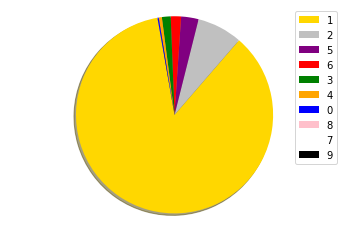

In [99]:
labels= '1','2','5','6','3','4','0','8','7','9'
sizes =df.passenger_count.value_counts()
colors= ['gold','silver','purple','red','green','orange','blue','pink','white','black']
explode=(0.1,0,0,0,0,0,0,0,0,0)
patches, texts=plt.pie(sizes, colors=colors, shadow= True, startangle=100)
plt.legend(patches,labels, loc="best")
plt.axis('equal')
plt.tight_layout
plt.show()

Text(0.5, 1.0, ' Number of passengers in a single ride v/s rides')

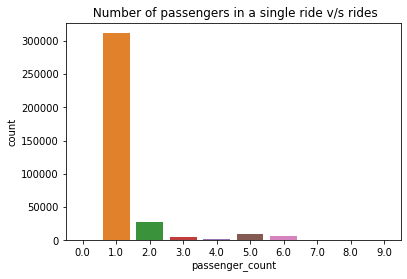

In [191]:
sns.countplot(x='passenger_count',data=df)
plt.title(" Number of passengers in a single ride v/s rides")

In [135]:
dfnew=df[df["passenger_count"]==5]
dfnew1=dfnew[((dfnew["pickup_time"]>='17:00:00') & (dfnew["pickup_time"]<='23:59:59')) | ((dfnew["pickup_time"]>='00:00:00') & (dfnew["pickup_time"]<='06:00:00')) ]
dfnew1.count()

VendorID                         5345
lpep_pickup_datetime             5345
lpep_dropoff_datetime            5345
store_and_fwd_flag               5345
RatecodeID                       5345
PULocationID                     5345
DOLocationID                     5345
passenger_count                  5345
trip_distance                    5345
fare_amount                      5345
rush_hour / overnight_charges    5345
mta_tax                          5345
tip_amount                       5345
tolls_amount                     5345
improvement_surcharge            5345
total_amount                     5345
payment_type                     5345
trip_type                        5345
congestion_surcharge             5345
pickup_date                      5345
pickup_time                      5345
dtype: int64

***This pie chart clearly depicts that people usually travel alone or in pair in greentaxi instead of groups. However, when we compare groups, we can observe that people in groups of 5 have frequently travelled, but when data is specifically obtained where passenger_count=5 and analysed, it shows no exceptional trend, suggesting that maybe people prefer to travel with their group of fiends and family in greentaxis. Also, timewise distibution of rides observed, that is, number of rides between 5pm and 6am which came out to be ~= 5000, also didn't suggest any exceptional sort of trend.***

In [137]:
df2=df.loc[:,['trip_distance','pickup_date','PULocationID']]
df2

,trip_distance,pickup_date,PULocationID
0,2.80,2019-11-01,66
1,5.59,2019-11-01,145
2,2.10,2019-11-01,255
3,1.23,2019-11-01,7
4,1.18,2019-11-01,129
...,...,...,...
362424,8.84,2019-11-30,80
362425,2.11,2019-11-30,42
362426,4.89,2019-11-30,41
362427,0.06,2019-11-30,78


In [158]:
df2=df2.sort_values(by="trip_distance", ascending=False)
df3=df2[df2["trip_distance"]>=24]

In [159]:
df3

,trip_distance,pickup_date,PULocationID
332540,105.72,2019-11-28,7
26009,71.86,2019-11-02,82
152986,68.63,2019-11-13,178
135231,67.23,2019-11-12,130
328867,64.10,2019-11-27,260
...,...,...,...
105670,24.06,2019-11-09,9
76319,24.05,2019-11-07,33
335945,24.04,2019-11-28,41
168424,24.03,2019-11-14,244


In [160]:
df3.pickup_date.value_counts()

2019-11-08    40
2019-11-11    39
2019-11-27    37
2019-11-15    36
2019-11-24    35
2019-11-22    35
2019-11-16    35
2019-11-23    35
2019-11-01    35
2019-11-09    35
2019-11-10    34
2019-11-05    34
2019-11-02    33
2019-11-18    33
2019-11-13    33
2019-11-28    32
2019-11-12    32
2019-11-17    32
2019-11-25    31
2019-11-06    31
2019-11-19    31
2019-11-30    31
2019-11-26    31
2019-11-04    30
2019-11-21    30
2019-11-03    29
2019-11-20    27
2019-11-29    24
2019-11-07    22
2019-11-14    21
Name: pickup_date, dtype: int64

In [151]:
maximum_rides_days

2019-11-01    14575
2019-11-08    14154
2019-11-22    14132
2019-11-15    13678
2019-11-09    13567
Name: pickup_date, dtype: int64

These commands above help us to evaluate the date(s) on which many long duration trips (trip_distance ranging between 27-106 miles) took place. ***It can be clearly observed that 40 long duration drips out of around 14100 total trips took place on 8th November 2019, which is the second largest number of total trips made in a day in November, followed by 36 long duration trips out of 13500 total trips on 15th November 2019. This indicates that 8th November and 15th November have been the weekend days with busiest roads in NewYork because afterall, Fridays are meant for going for shopping, going clubbing, partying and chilling with friends!***

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

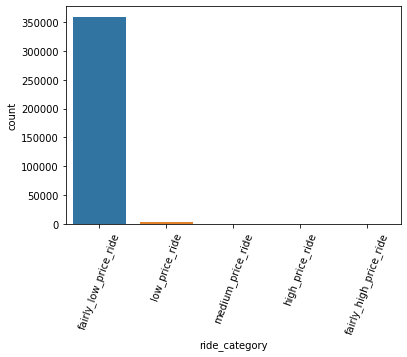

In [171]:
bins=np.linspace(min(df["total_amount"]),max(df["total_amount"]),6)
groups=["fairly_low_price_ride","low_price_ride","medium_price_ride","high_price_ride","fairly_high_price_ride"]
df["ride_category"]=pd.cut(df["total_amount"],bins,labels=groups)
df
sns.countplot(df['ride_category'])
plt.xticks(rotation=70)

Text(0, 0.5, 'number of rides')

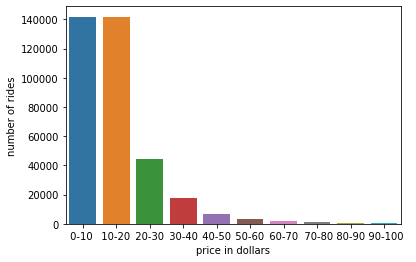

In [172]:
bins=np.linspace(0,100,11)
groups=[" 0-10  ","  10-20  ","  20-30  ","  30-40  ","  40-50  ","  50-60  ","  60-70  ","   70-80  ","   80-90   ","   90-100  "]
df["ride_category1"]=pd.cut(df["total_amount"],bins,labels=groups)
df
sns.countplot(df['ride_category1'])
plt.xlabel("price in dollars")
plt.ylabel("number of rides")

***The analysis above suggests that most of the rides fall into the category of fairly_low_price_ride and a few of them (considerable number) falls in the category of low_price_ride. Focusing clearly upon the values of these catrgories in another countplot shows that around 3,20,000 out of 3,62,394 total rides (~88%) have total_amount for the ride ranging between 0-30 $ suggesting that majority of greentaxis are booked for short distance trips. This fact is verified under as- ***

(array([1.00000e+01, 3.51406e+05, 9.75500e+03, 1.13700e+03, 5.90000e+01,
        1.80000e+01, 7.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-13.88,  -1.92,  10.04,  22.  ,  33.96,  45.92,  57.88,  69.84,
         81.8 ,  93.76, 105.72]),
 <a list of 10 Patch objects>)

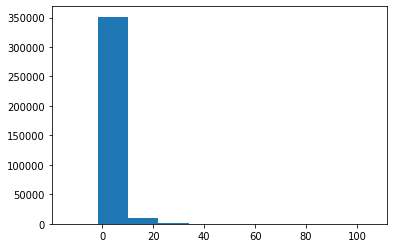

In [173]:
plt.hist(df['trip_distance'])

Text(0, 0.5, 'Number of trips')

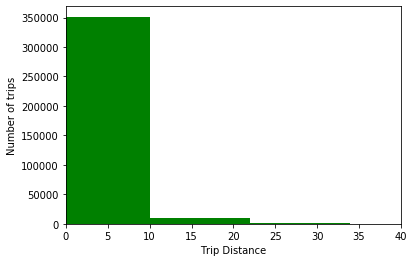

In [174]:
plt.hist(df['trip_distance'],color='green')
plt.xlim(0,40)
plt.xlabel('Trip Distance')
plt.ylabel('Number of trips')

***It is clearly depicted and hence, can be accurately concluded that majority (~88%) of the trips are short distanced as nearly 3,40,000 of trips are short distanced (0-10 miles only) that falls proportional with the low ranged price paid for nearly 3,20,000 trips.***

([<matplotlib.axis.XTick at 0x19f8a994208>,
 <a list of 6 Text xticklabel objects>)

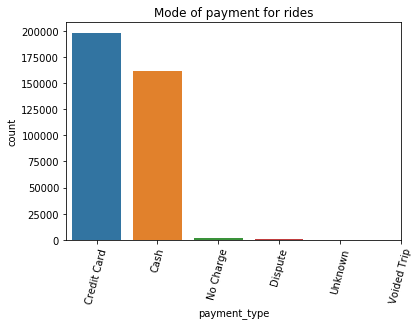

In [187]:
sns.countplot(x='payment_type',data=df)
plt.title("Mode of payment for rides")
positions=(0,1,2,3,4,5)

labels=("Credit Card","Cash","No Charge","Dispute","Unknown","Voided Trip")
plt.xticks(positions,labels,rotation=75)

***Most common mode of payment is credit card (~ 2,00,000 trips) followed by cash (~ 1,50,000 trips)***

In [248]:
newdf1=df.groupby('passenger_count')['payment_type'].value_counts()
newdf1

passenger_count  payment_type
0.0              1.0                452
                 2.0                226
                 3.0                 29
1.0              1.0             171319
                 2.0             137526
                 3.0               1619
                 4.0                738
                 5.0                  6
2.0              1.0              14292
                 2.0              12385
                 3.0                174
                 4.0                 62
                 5.0                  1
3.0              2.0               2772
                 1.0               2398
                 3.0                 24
                 4.0                 14
4.0              1.0                932
                 2.0                930
                 3.0                 11
                 4.0                  2
5.0              1.0               5676
                 2.0               4622
                 3.0                 38
          

***There is a basic common trend followed for single/ multiple passenger rides, with maximum rides payment made via credit card except for the case where passenger count=3, where maximum times the payment is made using cash. Disputes are maximum where passenger count is 1.***